# Результат ревью V2:

Теперь красных комментариев в твоей работе нет. Соответственно нет и никаких вопросов/моментов/комментариев, мешающих принять твой проект у меня прямо сейчас.

ПРОЕКТ ПРИНЯТ!
    
Желаю тебе успехов в учёбе, желаю, чтобы проекты сдавались или сразу, или после первой итерации! Удачи!

p.s Повторюсь, что для дальнейшего совершенствования в использовании groupby, понимании расширенных концептов использования pivot_table, crosstab и далее я очень рекомендую обратить внимание на следующий ресурс: https://dfedorov.spb.ru/pandas/.

p.p.s Я тебе на твой адрес эл/почты сейчас вышлю некоторые материалы из своей электронной библиотеки - надеюсь они будут тебе полезными в учёбе.


Приветствую коллега! 

Меня зовут Александр Непомнящий и я буду проверять твой проект. Предлагаю общаться на «ты» :))) Но, если это не удобно - мы вполне можем перейти на вы".

Вкратце обо мне: я работаю в сфере информационных технологий, аналитика (анализ) данных - это и мой рабочий функционал и личная, интересная мне область для саморазвития. Используемый стек: python, pandas, графические библиотеки matplotlib/seaborn/plotly. Сфера применения: маркетинговая аналитика в медицинской клинике (Клиника «Кивач», www.kivach.ru, республика Карелия). Если вдруг есть вопрос – что делает аналитик в коммерческой медицине – то вот короткий ответ. Самый главный вопрос, на который мы хотим получить ответ (и который в дальнейшем приведёт к перераспределению рекламного бюджета, плюс напрямую повлияет на разработку и предложению рынку новых лечебных программ) - это КТО ОН, НАШ КЛИЕНТ? Фактически это задача (на нашем внутреннем языке формулируется как построение и анализ «ПОРТРЕТА КЛИЕНТА»). Визуализируем и пытаемся придать смысл половозрастным данным наших клиентов, кто из какого региона и в какие времена года к нам приезжает. Учитываем количество приездов. Учитываем на какую программу этот конкретный клиент приехал в первый раз и как в дальнейшем меняются его предпочтения. Пытаемся построить модель оттока и спрогнозировать, когда клиент уйдёт в отток. Смотрим цифры (суммы трат клиентов на отдельных группах медицинских программ). Анализируем медицинские услуги, которые входят в путёвку, а также что, в каких количествах и на какую сумму клиент покупает дополнительно. Очень вкратце как-то так.

Теперь к сути: основная цель моей проверки - пройти по шагам, по логике твоего решения и обсудить те моменты, которые можно изменить, улучшить, довести до идеала. Такой формат работы двух программистов (аналитиков) ты или уже встречал(а), или встретишь на своей новой работе. Кто-то такой процесс называет "код-ревью", ну а как по мне, так это обмен опытом двух коллег, когда каждый из нас становиться лучше в процессе дискуссии.

Свои мысли, советы, комментарии и вопросы я буду оставлять в текстовых ячейках (markdown) ПОД твоим кодом. 
Для твоего удобства все эти заметки будут "цветными", как на примерах ниже:

"Зелеными" комментариями я буду отмечать твой элегантный ("красивый") код и/или удачные решения, на которые ты можешь смело опираться в будущих проектах.
<div class="alert alert-success">
<b>Отлично! 👍</b>

Отличная находка, элегантный код ...</div>

"Жёлтые" комментарии - это мои размышления, предложения, что-то, что в следующий раз можно сделать по-другому. "Жёлтые" комментарии не требуют твоих правок в проекте и их наличие НИКАК не повлияет на результат моей проверки. Но я искренне верю, что наш двусторонний диалог под "желтым" комментарием - это то, от чего твой проект только выиграет. 
<div class="alert alert-warning">
<b>Комментарий 👉</b>

Здесь я бы предложил использовать .... Мои аргументы в пользу этого ...</div>

"Красные" комментарий будут появляться, когда что-то пойдёт не так: например, код будет выдавать ошибку. Или, когда в проекте не будет ответов на основные вопросы, ради которых весь анализ и выполнялся. "Красные" комментарии необходимо будет исправить, прежде чем я смогу принять проект.
<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

В этой ячейке код работает не так как задумано ...</div>

Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Это поможет мне оперативно выполнить повторную проверку твоего проекта.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом, лучше всего в новой ячейке, сразу под моим комментарием. Если для своих комментариев ты будешь использовать какой-то заметный цвет, то мне будет легче отследить твои изменения, например так:

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Текст твоего комментария ...</font>
</div>

Ну и наконец информируй меня в том случае, если по твоему проекту подходит дедлайн! В таком случае я приложу усилия, чтобы ты сдал(а) его вовремя; буду оперативно, в приоритете проверять итерации ревью, а также отвечать на твои вопросы, если этого будет требовать ситуация.

**Распространенные типичные недочёты в проектах студентов:**

<div class="alert alert-danger" ❌>
Неработоспособный код. Проверь проект на работоспособность перед отправкой на проверку. Это важный навык, который тебе пригодится как на собеседовании, при выполнении тестового задания, так и перед совещанием у руководства компании.</div>

<div class="alert alert-danger" ❌>
Проект не структурирован. В проекте должна быть структура, т.е. названия разделов и подразделов должны быть записаны в ячейках Markdown.</div>

<div class="alert alert-warning" 👉 >
Отсутствие описания, целей проекта, его задач, выводов. В описании должны быть озвучены поставленные задачи, содержание датасета, промежуточные и финальные выводы. Как правило, заказчик читает только финальный вывод, поэтому важно добавить информацию о проведенном исследовании, применить форматирование текста, в общем, сделать красиво, чтобы было понятно, что проведено настоящее исследование и выводу можно верить.</div>  

<div class="alert alert-warning" 👉 >
"Длинный код". Код и и комментарии, которые прячутся за правым концом ячейки нужно переносить на новую строку. Твои будущие коллеги не оценят необходимость постоянного скроллинга. Согласно PEP8: https://www.python.org/dev/peps/pep-0008/ длина строки не должна превышать 79 символов.</div>

<div class="alert alert-warning" 👉 >
Твои коллеги ценят и твое и своё время, поэтому "подсвечивай" свои комментарии в ячейках Markdown. Подробнее про синтаксис Markdown, с примерами, можно почитать здесь: https://paulradzkov.com/2014/markdown_cheatsheet/?</div>


# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Для того чтобы сделать вывод от наличии зависимости расчитаем процент наличия долгов в зависимости от количества детей

In [22]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
(data.groupby('children')['debt'].mean() * 100)

children
0    7.543822
1    9.234609
2    9.454191
3    8.181818
4    9.756098
5    0.000000
Name: debt, dtype: float64

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Здесь у тебя абсолютно верное решение. Но покажу вариант для нашего случая ещё более короткий, фактически "однострочник". 
    
Суть его основана вот на чём: если у нас есть бинарная переменная, здесь это debt, которая принимает значение 1-должник, 0-не должник, то sum по debt будет является количеством должников в группе, а count по debt - общим количеством заемщиков в этой группе. Как узнать % должников? Очевидно, что разделить sum на count, что ты собственно и делаешь. Но смотри, отношение sum к count (это из школьной математики следует) есть ..... среднее, то есть mean, поэтому наш "однострочник" выглядит так:

	data.groupby('children')['debt'].mean()
</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>
        Спасибо, понял! Сразу почему-то не догадался об этом. Потребует ли такое решение в дальнейшем комментариев о том, почему расчет ведется таким образом или это само собой разумеющееся решение?</font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

**Потребует ли такое решение в дальнейшем комментариев о том, почему расчет ведется таким образом или это само собой разумеющееся решение?** - это математика средней школы.
    
Положа руку на сердце мой вариант он скорее красивый, чем практичный. Дело в том, что и sum и count и mean - каждая из этих функций агрегации дает необходимую для принятия решения о структуре наших данных информацию. Поэтому в реальном проекте я бы не пользовался этой "красотой". Вот такой вариант - он более предпочтительный:
    
    data.groupby('children').agg(['sum', 'count', 'mean'])
</div>


Можно заметить, что процент наличия долга у родителей несколько выше, чем у бездетных. Но родители с 5-ю детьми показывают чудеса планирования, стоит уточнить как много клиентов разных категорий у банка:

In [23]:
data.groupby('children')['debt'].count()

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: debt, dtype: int64

Кажется показатели родителей с 5-ю детьми не являются репрезентативными - их всего 9, в таком случае всего лишь при добавлении 1 клиента с долгами и 5-ю детьми показатель резко изменит значение до 10%. 

Рассчитаем разницу между вероятность появления долга у бездетных и средней вероятностью появления долга у родителей с детьми(категорию с 5-ю детьми игнорируем как не репрезентативную):

In [24]:
(data.groupby('children')['debt'].mean().loc[1:4].mean() - data.groupby('children')['debt'].mean().loc[0]) * 100

1.6128566423186288

**Вывод:** 

Из полученных значений можно сделать вывод о том, что наличие детей увеличивает вероятность возникновения долга в среднем на  1,6%. Количество детей влият на вероятность возникновения долга значительно меньше.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Да, конечно «разбег» между "цифрами" в наших данных мал. **Возможно**, что в рамках имеющихся данных сделать вывод о том, что семьи с детьми относительно семей без оных имеют какие-то задержки в выплатах кредитов нельзя. Слишком уж близки доли, чуть измениться выборка и значения могут измениться в другую сторону. То есть можно сделать вывод, что сколь угодно значимой разницы между группами нет ... однако учти, что даже небольшие разницы могут существенно сказываться на кредитном портфеле банка.

Однако, если считать, что **любая** разница между группами есть повод для «разделения» классов, то я бы сделал такой вывод: кредитополучатели без детей являются более ответственными, чем клиенты, у которых есть дети. Видимо, наличие ребенка накладывает на клиента дополнительные финансовое бремя (обязательства) и клиенты либо менее ответственно относятся к своим кредитным обязательствам, либо не имеют возможности в срок оплачивать обязательства.

Ну и что ещё можно увидеть в наших данных (агрегация «по count» в этом может помочь), то, что по некоторым группам заемщиков у нас недостаточно данных. Говорят, что выборка не сбалансирована, классы в выборке имеют разные размеры.

P.S. И вот ещё какой важный момент – да, на больших суммах и маленькие доли процента выльются в значительные объемы. Но вообще, насколько я понимаю логику кредитного бизнеса, дело не в том, чтобы кому-то не давать денег, а в том, чтобы компенсировать риск выдачи кредитным процентом. То есть, потенциальный должник заплатит более высокий процент за использование кредита. Так что в этой задаче фактически рассматривается вопрос - повышать ли процент заемщику с детьми. И статистика, которая показывает, что человек с 4 детьми просрочит выплату примерно так же, как и с двумя, - она, на мой взгляд, не обосновывает ужесточение кредитных условий для семей с детьми. К тому же тут зафиксировано количество детей только на момент выдачи кредита, никто не гарантирует, что их не станет больше в течение срока выплаты. Таким образом из этих данных можно сделать скорее другой вывод: кредитный портфель бездетных (со сроками выданных кредитов по несколько лет) скорее всего со временем ухудшится по показателю возврата денег (какая-то часть бездетных заведут детей, и у них должников из 7,5% станет 9%). И тогда этот риск можно было бы закладывать заранее (но для этого хорошо было бы понимать, сколько бездетных перейдут в категорию «с детьми» в течение 5 лет, например).
</div>


#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Расчитаем процент наличия долгов в зависимости от семейного положения:

In [25]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
(data.groupby('family_status')['debt'].sum() / data.groupby('family_status')['debt'].count()) \
.sort_values(ascending=False) * 100

family_status
Не женат / не замужем    9.763948
гражданский брак         9.313014
женат / замужем          7.560558
в разводе                7.064760
вдовец / вдова           6.624606
Name: debt, dtype: float64

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Код очень длинный (а PEP8 определяет длину строки в 79 символов) - попробуй длинные - переносить, а между строками использовать пустые строки. Ну и желательно код комментировать, хотя бы коротко (что делаешь и каков будет результат - так твоим коллегам будет проще за твоей мыслью следить). Этот комментарий может относиться к нескольким ячейкам этой «тетрадки».

Хороший разработчик форматирует и комментирует свой код, тогда другие разработчики быстрее разберутся в программе. Это важно, ведь код чаще читают, чем пишут: напишет один, а прочтут — сотни или тысячи (если код хороший). 
«Пишите код так, как будто сопровождать его будет склонный к насилию психопат, который знает, где вы живете.» ©1991, John F. Woods, разработчик

---
Давай обсудим стиль кодирования (программирования)? Смотри что сейчас происходит в этой ячейке (**возможно не всё применимо к твоему коду здесь, но я попытался вспомнить все часто встречающиеся недочёты**), что "режет" глаз и что можно сделать по-другому, чуть лучше: 

1. Комментарии к строке кода: они должны располагаться выше соответствующей строки кода (выше строки к которой относятся) и должны быть от этой строки отделены пустой строкой. Если же они расположены справа, то для того чтобы увидеть, что там написано приходится пользоваться скроллиногом. Надо добиться того, чтобы ячейку не приходилось прокручивать, т.к. это не добавляет удобства ни при отладке кода, ни для понимания что в этой ячейке "происходит". Как альтернатива – комментарий может размещаться выше, в Markdown-ячейке.
    
2. Бывает, что встречаются очень длинные строки кода, которые также уходят за правый край ячейки. Такие строки должны разбиваться разделителем (вот таким: \\). Это best practice, требование PEP8, а именно: PEP8 определяет длину строки в 79 символов.
    
3. **В идеале**: одна ячейка - одна строка кода. Почему так? Да как минимум из соображения понятности: будучи выполненной, под этой ячейкой должен отображаться результат трансформации данных. Ты или твой коллега должны видеть, как поменялись данные после выполнения ячейки с кодом. Следующая ячейка - ещё строка кода и соответствующим output'ом. Будешь делать так - коллеги будут тебе благодарны за то, что легко будут следовать за твоей мыслью. И отладку это упрощает.
    
Ну и как противоположность - можно в одну ячейку "положить" результат 3-х последовательных groupby + ещё чего-нибудь. Разобраться с ходу "что происходит" будет очень трудно, придётся всё равно код разносить по ячейкам и смотреть последовательно что происходит. Но ведь логично это делать удобным способом сразу, ведь так?
    
4. Неиспользуемые, закомментированные строки выше вынеси в другую ячейку, отдельную, выше. Можешь для удобства своего прокомментировать (на память). И оставь там это код, так, чтобы он не смешивался с рабочим кодом.
</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>
        Внес изменения и разнес код на 2 строки. Аналогичные изменения по коду внес и дальше. Насколько необходимы комментарии в строке кода, при наличии комментариев в строке выше? </font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

**Насколько необходимы комментарии в строке кода, при наличии комментариев в строке выше?** - выше кода или в ячейке кода - это на любителя. Важнее, чтобы сложный код был в принципе прокомментирован.
</div>

Статистика говорит о том, что в каждой категории есть клиенты имеющие долги.
Проверим репрезентативность выборки:

In [26]:
data.groupby('family_status')['debt'].count()

family_status
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
гражданский брак          4134
женат / замужем          12261
Name: debt, dtype: int64

**Вывод:** 
Расчеты показывают, что между семейным положением и возвратом кредитов есть зависимость. Наиболее рисковые группы - "Не женат / не замужем" и "в разводе", а наименее - "женат / замужем". Разница в вероятности возникновения долга между наиболее и наименее рисковыми группами составляет 3,1%.

В зависимости от оценки рисков их можно сгруппировать по баллам и добавлять их(баллы) для расчета финальной категории риска возникновения долга.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

С теми же оговорками (... если считать, что любая разница между группами есть повод для «разделения» классов ...) кредитному отделу следует с осторожностью относиться к клиентам, которые не состоят или не состояли в браке. Согласно данным такие клиенты менее ответственные. Получается, что узаконенные отношения (включая и бывшие отношения) ведут к более ответственному отношению к своим обязательствам. Ну вроде как совпадает со здравым смыслом - семейные люди более скрупулёзно берегут свой семейное спокойствие и несут за него ответственность.

p.s. ниже, для последних 2-х ответов на вопрос я напишу свой вывод (как пример), как будто бы "разбег" между цифрами давал основание делать значимый вывод о различиях.
</div>


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Рассчитаем процент наличия долгов в зависимости от уровня дохода.

In [27]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
(data.groupby('total_income_category')['debt'].sum() / data.groupby('total_income_category')['debt'].count()) \
.sort_values(ascending=False) * 100

total_income_category
E    9.090909
C    8.498210
A    8.000000
B    7.060231
D    6.017192
Name: debt, dtype: float64

Проверим репрезентативность выборки:

In [28]:
data.groupby('total_income_category')['debt'].count()

total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: debt, dtype: int64

**Вывод:** 
Категория граждан D является наиболее кредитоспособной, выборка по ним также вполне репрезентативна.
Следом идут категории B, A, C в порядке возрастания риска возникновения долга. Выборка по ним так же репрезентативна. Исключение составляет
лишь категория A, но скорее всего клиентов с таким уровнем дохода в целом меньше всех.
Категория клиентов E не может считаться репрезентативной, но в целом на нее стоит обратить особое внимание. Возможно такие клиенты берут меньше кредитов или банк чаще отказывает им из-за рисков невозврата, поэтому и клиентов этой категории выборке мало.

В зависимости от оценки рисков их можно сгруппировать по баллам и добавлять их(баллы) для расчета финальной категории риска возникновения долга.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

На мой взгляд - это самый сложный вопрос (для интерпретации результатов) в этом проекте. 

Быстрый взгляд на данные (в случае графика - это конечно ещё более наглядным становиться): ожидаемо, для группы с низким доходом (Е) процент невозвратов самый высокий. Что более интересно, так это то, что с ростом доходов тенденция (D->C и B->А) к снижению числа долгов не сохраняется, а скорее даже растёт. Можно сказать, что по какой-то причине люди "перестают считать деньги" или планировать "наперёд". Из-за подобного поведения наших групп параметр ("доход") нельзя назвать надёжным при определении платёжеспособности клиента. Без дополнительной информации он может даже наоборот привести к выдаче кредита состоятельному, но не слишком "надёжному" клиенту, хотя, возможно, это может быть аномалия, вызванная недостаточным размером выборки для клиентов с категорией доходов А.    
    
А теперь мой вывод- дополнительный, альтернативный вариант твоему: исходя из здравого смысла логично предположить, что чаще всего должниками становятся люди с небольшим доходом, которым финансовые проблемы не позволяют вовремя осуществлять платежи. Но глядя на наши результаты лично мой вывод таков: выборка по заемщикам, как с наименьшим доходом, так и с наибольшим крайне недостаточна для формирования однозначных выводов. Можно думать, что E-категория самая низкооплачиваемая не может корректно распоряжаться деньгами и «влезает» в кредиты, но тогда неясно почему у А-категории также достаточно высокий процент задолженности. В общем вывод по группам А и Е неочевиден, слишком мало данных.

Если же взять для анализа только группы В, С и D, то по полученным данным не наблюдаем зависимости "те, кто получает больше ЗП, лучше возвращает кредит». В целом это логично, так как материальный достаток - не единственная переменная, которая влияет на качество кредитной истории.

p.s. Однако 2174 пропуска в данных столбца "total_income" ставят под сомнение полученный нами результат. Сводная таблица (или группировка) с данными о зависимости между уровнем дохода и возвратом кредита в срок возможно могла бы выглядеть иначе, если бы не пропущенные данные.
</div>


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Рассчитаем процент наличия долгов в зависимости от цели кредита.

In [29]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
(data.groupby('purpose_category')['debt'].sum() / data.groupby('purpose_category')['debt'].count()) \
.sort_values(ascending=False) * 100

purpose_category
операции с автомобилем      9.347978
получение образования       9.252758
проведение свадьбы          7.911803
операции с недвижимостью    7.255139
Name: debt, dtype: float64

Проверим репрезентативность выборки:

In [30]:
data.groupby('purpose_category')['debt'].count()

purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: debt, dtype: int64

**Вывод:** 
Выборка по всем целям кредита репрезентативна.
Наибольший риск в группах берущих кредит на транспорт и образование. Наименьший на проведение свадьбы и операций с недвижимостью.

В зависимости от оценки рисков их можно сгруппировать по баллам и добавлять их(баллы) для расчета финальной категории риска возникновения долга.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Всё подтверждается и цифрами, и здравым смыслом. Машины люди покупают в кредит гораздо дорогие, нежели могут соответствовать им своим доходом (ну кому не хочется красивую иномарку). А вот рисковать ипотечным жильём люди не хотят. Интересно конечно, что с образованием не так - как правило такие кредиты берут люди мотивированные, имеющие цель впереди, да и суммы таких кредитов судя по рынку онлайн образования не так велики. Ну и получается, что ещё более мотивированные люди берут деньги на организацию своей свадьбы)))
</div>


#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

При изначальном выводе информации о таблице можно было заметить, что данные отсутствуют в двух столбцах: `"days_employed"` и `"total_income"`. Причем количество пропущенных данных совпадает. 
Чтобы выявить закономерность выведем данные из пропущеных ячеек:

In [41]:
data_na = pd.read_csv('/datasets/data.csv')
data_na = data_na[data_na['days_employed'].isna()]
display(data_na.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Проверим, все ли строки с пропущенными данными мы отобрали.

In [46]:
data_na.info()
#data_na['children'].unique()
#data_na['education'].unique()
#data_na['family_status'].unique()
#data_na['dob_years'].unique()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


Количество строк совпадает с количеством пропусков, а столбцы `"days_employed"` и `"total_income"` содержат только пропуски. следовательно,` data_na` содержит все строки с пропусками.

*Ответ:* 

Среди пропущенных данных имеется лишь корреляция между столбцами `"days_employed"` и `"total_income"`. Учитывая, что исходная таблица содержит дробные значения в колонке дохода, что нехарактерно для записи сумм, можно предположить, что это значение рассчитывается на основании трудового стажа клиента. В таком случае, если трудовой стаж не указан, то и расчет дохода не может быть произведен.

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

**возможно при отсутствии информации по одному из них система не позволяет заполнить другой. Нельзя также исключать человеческого фактора** - в таком случае анкеты не прошли бы автоматизированную проверку и они (клиенты) не получили бы кредит в нашем банке. А по факту они кредит получили (так как находятся в таблице). Почему?
    
Нужно докрутить ответ на этот вопрос. **СОВЕТ:** попробуй посмотреть на **количество пропусков** в наших данных, а также на то, **в каких столбцах** они располагаются, а также на то, **в одних и тех же** строках имеются ли пропуски.
</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>
        Я не могу найти какой-то определенной закономерности. Я вижу, что количество пропущенных строк - 2174, а данные пропущены только в колонках трудового стажа и дохода. То есть предполагаю зависимость этих колонок друг от друга. Но сколько я не смотрю на другие колонки я не могу найти закономерности и зависимости от них. Изначально я предполагал, что пропуски у пенсионеров, но когда получил уникальные значения, то увидел, что данные пропущены у нескольких категорий. Та же самая история и с другими столбцами. Видимо мне нужна твоя помощь чтобы разобраться.</font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

В наших данных пропуски в столбцах "трудовой стаж" и "ежемесячный доход" абсолютно идентичны. Количество строк с отсутствующими данными в обоих указанных столбцах совпадает и равно 2174. Маловероятно, что специалисты по выдаче кредитов, заполнив все без исключения ячейки других столбцов по каждому кредитополучателю, оставляли незаполненными именно два показателя, и сделали это ровно 2174 раза в каждом столбце. Даже не проводя проверку, во всех ли случаях незаполненные ячейки находятся в одной и то же строке с высокой долей вероятности можно утверждать, что произошла техническая ошибка при формировании таблицы с исходными данными (либо некий сбой во время выгрузки данных на анализ, либо при объединении данных в единый файл, который также должен был передаваться на анализ, либо эти данные не собирались). Это моё ИМХО (врачи говорят – «второе мнение»).
</div>


#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 
По сравнению со средним значением применение медианного менее всего искажает данные для количественных переменных. Особенно это заметно, когда в ряде данных имеются выделяющиеся значения, при расчете среднего они могут значительно исказить статистику и повлиять на общий вывод. В случае же применения медианного значения такие выделяющиеся значения не скажутся на общей картине, а значит сделанный вывод будет точнее.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Да, в случае, если в данных наблюдаются "выбросы", то даже небольшое их количество может сильно "перетягивать" среднее значение в большую или меньшую сторону. Медиана зачастую даёт более правдивую картину. В общем случае, в реальных "живых" проектах я рекомендую в каждом случае смотреть на то, как распределены данные.
</div>


### Шаг 4: общий вывод.

#### Текст исходной задачи:

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

#### Общий вывод

Для проведения анализа были использованы данные по 21525 клиентам банка включающие возраст, пол, уровень образования и дохода, а также семейное положение и сведения о наличии детей. Предварительный анализ показал наличие 9,9% (2174) клиентов с пропущенными данными по трудовому стажу и доходу. Учитывая значительную долю отсутствующей информации допускается некоторое отклонение полученных результатов от реальной ситуации.

Изначально были поставлены задачи по выявлению зависимости погашения кредита от двух факторов:
+ количества детей;
+ семейного положения.

В ходе анализа также были проверены другие факторы:
+ уровень дохода;
+ цель кредита.

##### Полученные результаты:
**1) Количество детей клиента не является показательным для расчета риска возникновения долга, однако само наличие детей увеличивает риск в среднем на 1.6%. Категория клиентов с 5-ю детьми не является репрезентативной, так как таких клиентов у банка мало (9).**

| Количество детей  | Процент наличия долга |
| :-------------- | ------------- |
| Нет детей  | 7.54%  |
| 1 ребенок  | 9.23%  |
| 2 ребенка   | 9.45%  |
| 3 ребенка  | 8.18%  |
| 4 ребенка  | 9.76%  |

            
Можно предположить, что наличие детей делает более сложным планирование клиентом своего бюджета, из-за чего и увеличивается вероятность риска.

**2) Анализ показал наличие зависимости долга по кредиту от семейного положения, разница между категориями клиентов составляет до 3.1% вероятности возникновения долга.**

| Семейное положение      | Процент наличия долга |
| :--------------      | ------------- |
| Не женат / не замужем  | 9.76%  |
| гражданский брак       | 9.31%  |
| женат / замужем       | 7.56%  |
| в разводе             | 7.06%  |
| вдовец / вдова         | 6.62%  |
   
          
Полученные значения наводят на предположение, что клиенты с меньшим жизненным опытом склонны к просрочке кредитов. И наоборот, имеющие опыт преодоления жизненных проблем являются более отвественными заемщиками.

**3) Зависимость наличия долга от дохода присутствует, разница между категориями составляет до 3%.**

| Категория дохода | Сумма дохода          | Процент наличия долга |
| :------------ | :--------------     | ------------- |
| Е             | 0 - 30 000          | 9.09%  |
| С             | 50 001 - 200 000    | 8.49%  |
| А             | 1 000 001+          | 8.00%  |
| В             | 200 001 - 1 000 000 | 7.06%  |
| D             | 30 0001 - 50 000    | 6.01%  |


Категория граждан D является наиболее кредитоспособной. Следом идут категории B, A, C в порядке возрастания риска возникновения долга. Причем клиентов с категорией А мало (25), отчего есть вероятность большой погрещности в расчетном риске этой категории. Таким образом следует сделать вывод об отсутствии прямой зависимости уменьшения риска возникновения долга при увеличении суммы дохода клиентов. 

Категория клиентов E согласно анализу является наиболее рисковой, но не может считаться репрезентативной так как таких клиентов у банка очень мало (22). Возможно такие клиенты берут меньше кредитов или банк чаще отказывает им из-за рисков невозврата (расчетный процент также оказался наибольшим), поэтому и клиентов этой категории в выборке мало.

**4) Увеличение риска возникновения долга от целей кредита подтверждается. Разница между группами составляет до 2%.**

| Категория дохода          | Процент наличия долга |
| :------------          | ------------- |
| операции с автомобилем     | 9.35%  |
| получение образования       | 9.25%  |
| проведение свадьбы         | 7.91%  |
| операции с недвижимостью   | 7.26%  |

Наибольший риск в группах берущих кредит на транспорт и образование. Наименьший на проведение свадьбы или операции с недвижимостью.

##### Рекомендации

При построении модели скоринга можно присваивать баллы "риска" за определенное увеличение вероятности риска клиента согласно проведенному анализу. Например, пусть 1 балл соответствет увеличению риска на 0.1%, а таком случае клиент с детьми получает 16 баллов риска, не женатые/ не замужем 31 балл. 

Для оценки влияния нескольких факторов следует провести дополнительный анализ и определить их взаимное влияние.

Повторный анализ, при условии заполнения пропущенных данных, также может уточнить общую ситуацию и выявить ранее упущенные закономерности.

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

Ну даже и добавить-то собственно и нечего. Молодец, всё чётко, без воды, по делу и с подтверждением цифрами.
</div>


<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

Финальный вывод конечно нужно более детальным и структурированным сделать (и уж как минимум – «цифрами» его дополнить). Общий вывод - это изюминка работы аналитика. Большинство заказчиков посмотрят сначала его (а некоторые только его). Чтобы выводы не огорошивали заказчика своей очевидностью, стоит добавить в них цифр, выводов, коэффициентов корреляций, графиков. Сделай так, чтобы вся найденная в данных информация была отражена в выводе.
    
Твои, как аналитика, выводы - это данные ("алмаз"), которые родились из большого объёма неструктурированной, зачастую, казалось бы, несвязанной между собой информации ("горной породы"). 

Для "не специалиста", поверь, выводы, которые ты делаешь будут казаться чем-то сродни волшебства. Эти люди "не специалисты" не будут понимать, НУ КАК ВОТ из наших табличек с кредитами можно было достать выводы, для того, чтобы спрогнозировать возврат/невозврат кредита. 

Но то, что они не понимают всего процесса - это не их беда. Просто они работают по-другому и мыслят другими категориями. Под "этими людьми" я здесь имею в виду топ-менеджеров, генеральных директоров и может быть ещё более высокий уровень. Их уровень понимания - это красивая и понятная им презентация в PowerPoint, с графиками бизнес показателей, с цифрами. Презентация из 3-5-10 слайдов это твоя, как аналитика "лебединая песня", те "алмазы", которые получены и облечены в ту форму, которая позволит лицам, принимающим решения принять такие зачастую многомилионной стоимости решения, которые напрямую повлияют на тот бизнес в котором ты работаешь.

p.s. зачастую студенты, кроме описания в выводе обнаруженных трендов/тенденций и "цифр" по исследуемым группам - приводят в выводе портрет *идеального* с их точки зрения заемщика ... что-то типа "человек среднего возраста, состоящий в браке, без детей, с доходом от 30 000, нуждающийся в кредите на недвижимость". Я бы был осторожнее и без дополнительного исследования не делал бы такого вывода. Вот аргументы: 1. в наших данных человека с таким "портретом" может не быть (и уж скорее всего большОго количества записей, чтобы сделать статистически значимый вывод, точно нет), 2. может быть так, что каждая отдельная характеристика действительно описывает идеального заемщика, но все вместе, в совокупности они не есть пример идеального для банка кредитополучателя и 3. мы ведь такого анализа в нашем анализе не делали, так?

В общем, возможный (**воспроизводить твой вывод в таком же виде совсем не обязательно**) пример вывода - в виде скрина:

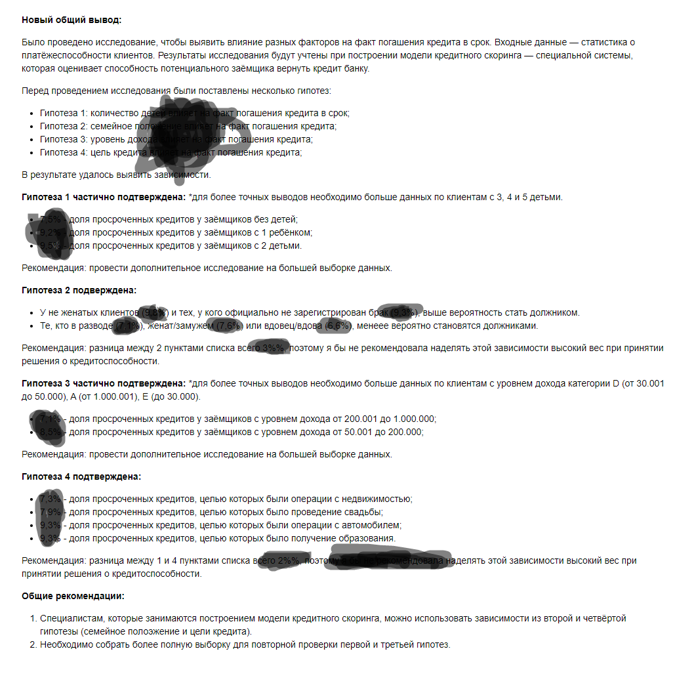</div>


# Результат ревью:

Я отмечаю адекватный задаче уровень твоей программистской подготовки. Ты используешь продвинутые концепции языка Python и библиотеки pandas. Использование механизмов группировки данных (groupby) и/или создания сводных таблиц (pivot_table) является рекомендуемым и обязательным в работе любого аналитика данных и любого проекта. Ты показываешь владение этим инструментом.

Для экспертного совершенствования в использовании groupby, понимании расширенных концептов использования pivot_table, crosstab и далее я очень рекомендую тебе обратить внимание на следующий ресурс: https://dfedorov.spb.ru/pandas/. Рекомендуемые темы/уроки для освоения тем выше - на скрине ниже.

С комментированием никаких проблем нет. Твоих объяснений достаточно для понимания твоими коллегами хода мыслей.
 
Зелёным цветом я отметил и прокомментировал удачные и элегантные решения, на которые ты можешь опираться в будущих проектах.

Однако есть принципиальные моменты, которые не позволяют мне принять твой проект в его нынешнем состоянии:

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b> 

1. "Докрути" ответ на вопрос "Приведите возможные причины появления пропусков в исходных данных".
    
2. Финальный вывод в таком виде - это не то, что заказчик ждет от аналитика данных. Профессионал обязан предоставить точные, четкие и корректные **прогнозы и рекомендации**, которые помогут твоей компании в реализации скорингового алгоритма. Здесь, в финальном выводе требуется максимально подробно и с цифрами описать все те инсайды в данных, которые были обнаружены в ходе выполнения проекта.</div>

Эти 2 момента требуют твоего внимания. Комментарии помечены красным цветом. 

Подводя итог: хорошая работа на самом-то деле, молодец! Есть несколько моментов к исправлению, но уверен, что они не вызовут у тебя сложностей. После доработки обязательно проверь комментарии и выводы. Их нужно будет скорректировать. Жду доработанную версию проекта на повторное ревью.

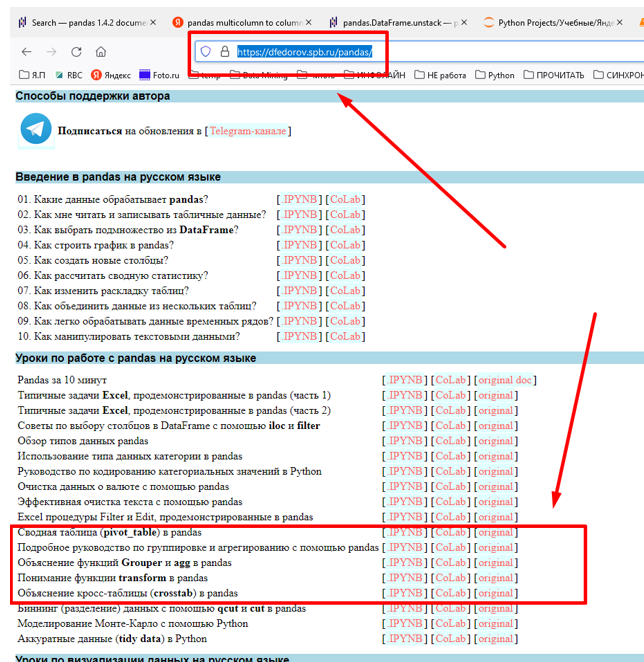

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>
Я обновил общий вывод, структурировав информацию и добавив показатели, которые необходимы для дальнейшей работы и принятия решения. Исходил из того, что вывод могут читать отдельно от работы, а значит нельзя ссылаться на данные из текста анализа.</font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

Отлично, молодец. Гендир не будет перелистывать "тетрадку" скорее всего. Он сразу к финальному выводу наверняка обратиться. ПОэтому тот и должен быть полным (независимо от полноты всех промежуточных выводов).
</div>